In [1]:
import sys
# sys.path.insert(0, '/Users/sbredenk/Repos/CORAL_nesc/CORAL')
sys.path.insert(0, '/Users/sbredenk/Repos/ORBIT_semitaut/ORBIT')
from CORAL import SharedLibrary, GlobalManager, FixedPipeline, FloatingPipeline, CombinedPipeline
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yaml

In [2]:
import os
base = os.path.join(os.getcwd(), "analysis", "base.yaml")
base_float = os.path.join(os.getcwd(), "analysis", "base_float.yaml")
library = os.path.join(os.getcwd(), "analysis", "library")

# Fixed

In [3]:
fixed_projects = os.path.join(os.getcwd(), "analysis", "pipelines", "fixed_pipeline.csv")
pipeline = FixedPipeline(fixed_projects, base)

allocations = {
    "wtiv": [('example_heavy_lift_vessel', 2),('example_wtiv', 2)],
    "feeder": ('example_heavy_feeder', 6),
    "port": [('northeast', 1), ('central', 1), ('south', 1)],
}

In [4]:
manager = GlobalManager(pipeline.configs, allocations, library_path=library)
# print(pipeline.configs)
manager.run()

c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\vessels\example_heavy_lift_vessel.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\vessels\example_wtiv.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\vessels\example_heavy_feeder.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\ports\northeast.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\ports\central.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\ports\south.yaml
ORBIT library intialized at 'c:\Users\sbredenk\Repos\ORBIT_semitaut\ORBIT\library'


In [5]:
df = pd.DataFrame(manager.logs).iloc[::-1]
df = df.reset_index(drop=True).reset_index()

port_map = pipeline.projects[["name", "port_region"]].set_index("name").to_dict()['port_region']
df['port'] = [port_map[name] for name in df['name']]

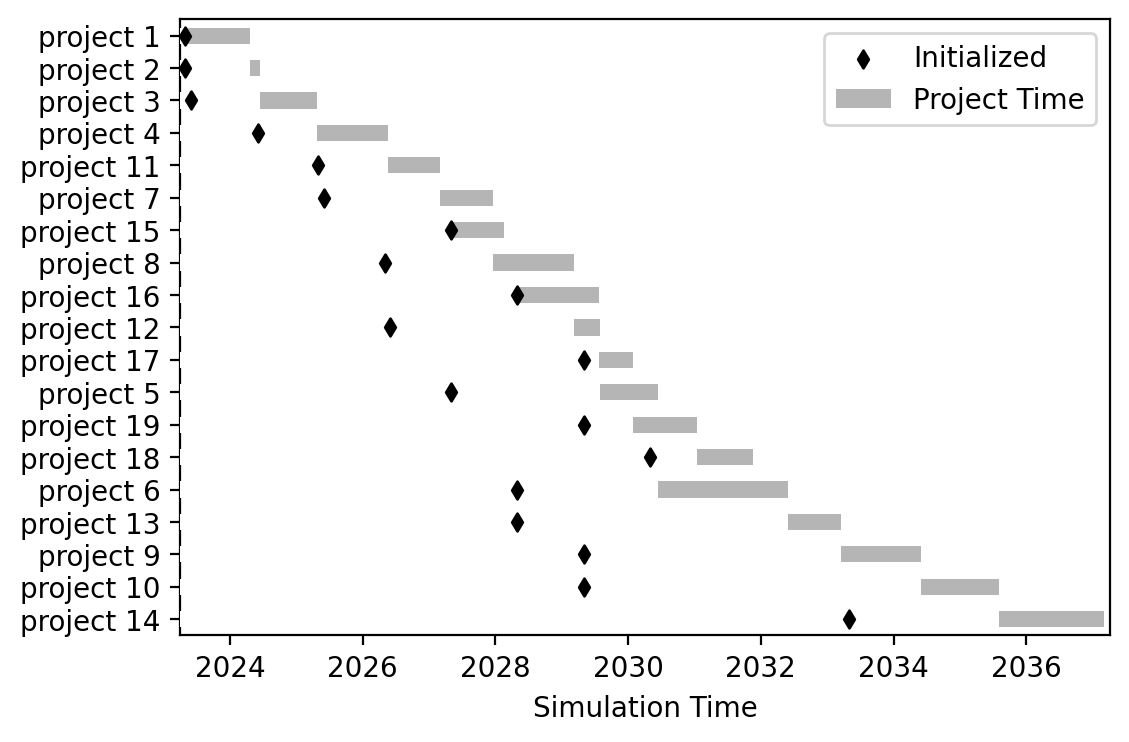

In [6]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)

color_map = {
    "northeast": "tab:green",
    "central": "tab:red",
    "south": "tab:blue"
}

df["Date Finished"].plot(kind="barh", ax=ax, zorder=4, label="Project Time", color="#B5B5B5")
df["Date Started"].plot(kind="barh", color="w", ax=ax, zorder=4, label="__nolabel__")

df.plot(kind="scatter", x="Date Initialized", y="index", color='k', ax=ax, zorder=5, label="Initialized", marker="d")
# df.plot(kind="scatter", x="request-wtiv-date", y="index", color='tab:orange', ax=ax, zorder=5, label="WTIV", marker="x")

groups = df.groupby("port")
# for name, group in groups:
#     group.plot(kind="scatter", x="request-port-date", y="index", ax=ax, marker="x", c=color_map[name], zorder=5, label=f"{name} ports".capitalize())

ax.set_xlabel("Simulation Time")
ax.set_ylabel("")
_ = ax.set_yticklabels(df['name'])

ax.legend()

ax.set_xlim(manager._start - dt.timedelta(days=30), df["Date Finished"].max() + dt.timedelta(days=30))
plt.savefig('analysis/results/fixed_test.png')

# Floating

In [7]:
floating_projects = os.path.join(os.getcwd(), "analysis", "pipelines", "floating_pipeline.csv")
pipeline = FloatingPipeline(floating_projects, base_float)

allocations = {
    "ahts_vessel": ('example_ahts_vessel', 2),
    "towing_vessel": ('example_towing_vessel', 2),
    "feeder": ('example_heavy_feeder', 6),
    "port": [('northeast', 1), ('central', 1), ('south', 1)],
}

In [8]:
manager = GlobalManager(pipeline.configs, allocations, library_path=library)
# print(pipeline.configs)
manager.run()

c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\vessels\example_ahts_vessel.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\vessels\example_towing_vessel.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\vessels\example_heavy_feeder.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\ports\northeast.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\ports\central.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\ports\south.yaml


In [9]:
df = pd.DataFrame(manager.logs).iloc[::-1]
df = df.reset_index(drop=True).reset_index()

port_map = pipeline.projects[["name", "port_region"]].set_index("name").to_dict()['port_region']
df['port'] = [port_map[name] for name in df['name']]
df

,index,name,Initialized,Started,Finished,Date Initialized,Date Started,Date Finished,port
0,0,project 14,87672,143776.279221,162182.753247,2033-05-01,2039-09-24 17:00:00,2041-10-30 15:00:00,northeast
1,1,project 10,52608,130073.805195,143776.279221,2029-05-01,2038-03-02 18:00:00,2039-09-24 17:00:00,northeast
2,2,project 9,52608,116030.266234,130073.805195,2029-05-01,2036-07-25 15:00:00,2038-03-02 18:00:00,northeast
3,3,project 13,43848,106737.577922,116030.266234,2028-05-01,2035-07-04 10:00:00,2036-07-25 15:00:00,northeast
4,4,project 6,43848,84022.616883,106737.577922,2028-05-01,2032-11-29 23:00:00,2035-07-04 10:00:00,northeast
5,5,project 18,61368,76056.207792,86057.616883,2030-05-01,2032-01-03 01:00:00,2033-02-22 18:00:00,central
6,6,project 5,35064,73863.337662,84022.616883,2027-05-01,2031-10-03 16:00:00,2032-11-29 23:00:00,northeast
7,7,project 19,52632,64920.584416,76056.207792,2029-05-02,2030-09-26 01:00:00,2032-01-03 01:00:00,central
8,8,project 12,27048,69106.649351,73863.337662,2026-06-01,2031-03-19 11:00:00,2031-10-03 16:00:00,northeast
9,9,project 8,26304,54900.175325,69106.649351,2026-05-01,2029-08-04 13:00:00,2031-03-19 11:00:00,northeast


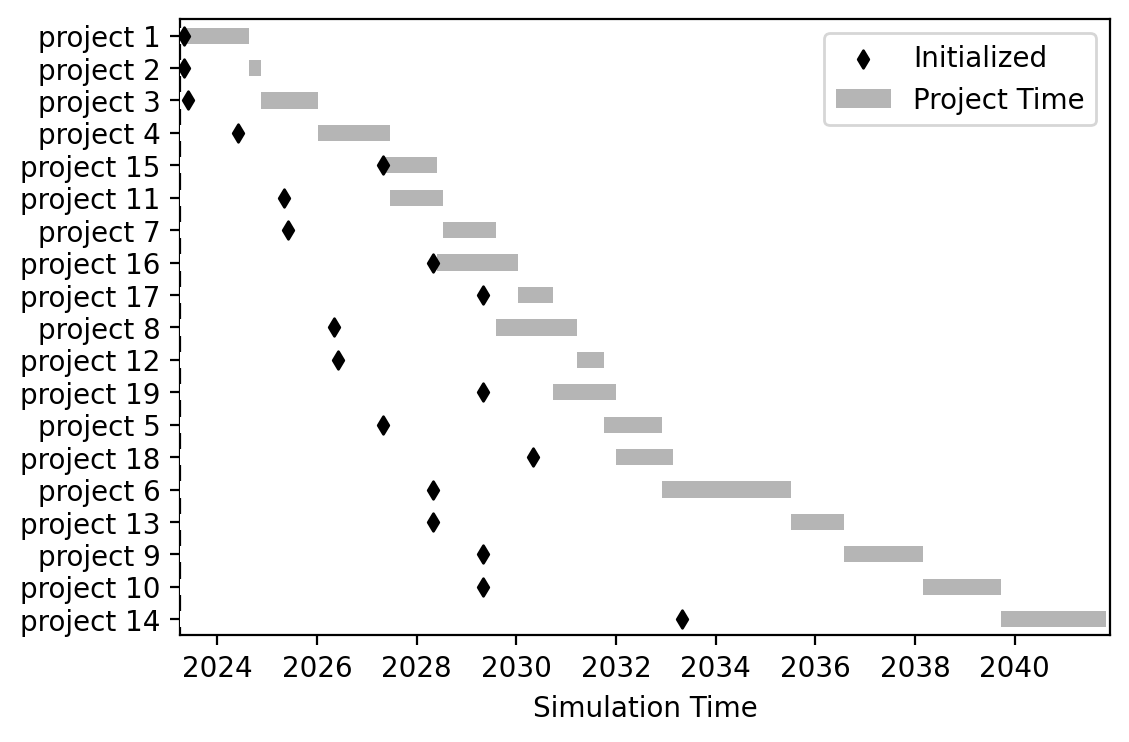

In [10]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)

color_map = {
    "northeast": "tab:green",
    "central": "tab:red",
    "south": "tab:blue"
}

df["Date Finished"].plot(kind="barh", ax=ax, zorder=4, label="Project Time", color="#B5B5B5")
df["Date Started"].plot(kind="barh", color="w", ax=ax, zorder=4, label="__nolabel__")

df.plot(kind="scatter", x="Date Initialized", y="index", color='k', ax=ax, zorder=5, label="Initialized", marker="d")
# df.plot(kind="scatter", x="request-wtiv-date", y="index", color='tab:orange', ax=ax, zorder=5, label="WTIV", marker="x")

groups = df.groupby("port")
# for name, group in groups:
#     group.plot(kind="scatter", x="request-port-date", y="index", ax=ax, marker="x", c=color_map[name], zorder=5, label=f"{name} ports".capitalize())

ax.set_xlabel("Simulation Time")
ax.set_ylabel("")
_ = ax.set_yticklabels(df['name'])

ax.legend()

ax.set_xlim(manager._start - dt.timedelta(days=30), df["Date Finished"].max() + dt.timedelta(days=30))
plt.savefig('analysis/results/floating_test.png')

# Combined

In [11]:
combined_projects = os.path.join(os.getcwd(), "analysis", "pipelines", "combined_pipeline.csv")
pipeline = CombinedPipeline(combined_projects, base, base_float)

allocations = {
    "ahts_vessel": ('example_ahts_vessel', 2),
    "towing_vessel": ('example_towing_vessel', 2),
    "wtiv": [('example_heavy_lift_vessel', 2),('example_wtiv', 2)],
    "feeder": ('example_heavy_feeder', 6),
    "port": [('northeast', 1), ('central', 1), ('south', 1)],
}

In [12]:
manager = GlobalManager(pipeline.configs, allocations, library_path=library)
# print(pipeline.configs)
manager.run()

c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\vessels\example_ahts_vessel.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\vessels\example_towing_vessel.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\vessels\example_heavy_lift_vessel.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\vessels\example_wtiv.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\vessels\example_heavy_feeder.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\ports\northeast.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\ports\central.yaml
c:\Users\sbredenk\Repos\CORAL_nesc\CORAL\analysis\library\ports\south.yaml


In [13]:
df = pd.DataFrame(manager.logs).iloc[::-1]
df = df.reset_index(drop=True).reset_index()

sub_map = pipeline.projects[["name", "substructure"]].set_index("name").to_dict()['substructure']
df['substructure'] = [sub_map[name] for name in df['name']]

df = df.replace('semisub','floating')
df = df.replace('monopile','fixed')

df

,index,name,Initialized,Started,Finished,Date Initialized,Date Started,Date Finished,substructure
0,0,project 14,87672,127396.492629,145802.966655,2033-05-01,2037-11-11 05:00:00,2039-12-18 03:00:00,floating
1,1,project 10,52608,114031.031548,127396.492629,2029-05-01,2036-05-03 08:00:00,2037-11-11 05:00:00,fixed
2,2,project 9,52608,99743.695844,114031.031548,2029-05-01,2034-09-16 00:00:00,2036-05-03 08:00:00,fixed
3,3,project 13,43848,90451.007533,99743.695844,2028-05-01,2033-08-24 20:00:00,2034-09-16 00:00:00,floating
4,4,project 6,43848,72954.924584,90451.007533,2028-05-01,2031-08-26 19:00:00,2033-08-24 20:00:00,fixed
5,5,project 18,61368,76056.207792,86057.616883,2030-05-01,2032-01-03 01:00:00,2033-02-22 18:00:00,floating
6,6,project 19,52632,64920.584416,76056.207792,2029-05-02,2030-09-26 01:00:00,2032-01-03 01:00:00,floating
7,7,project 5,35064,64150.285983,72954.924584,2027-05-01,2030-08-24 23:00:00,2031-08-26 19:00:00,fixed
8,8,project 17,52608,58822.428571,64920.584416,2029-05-01,2030-01-14 23:00:00,2030-09-26 01:00:00,floating
9,9,project 12,27048,59393.597671,64150.285983,2026-06-01,2030-02-07 18:00:00,2030-08-24 23:00:00,floating


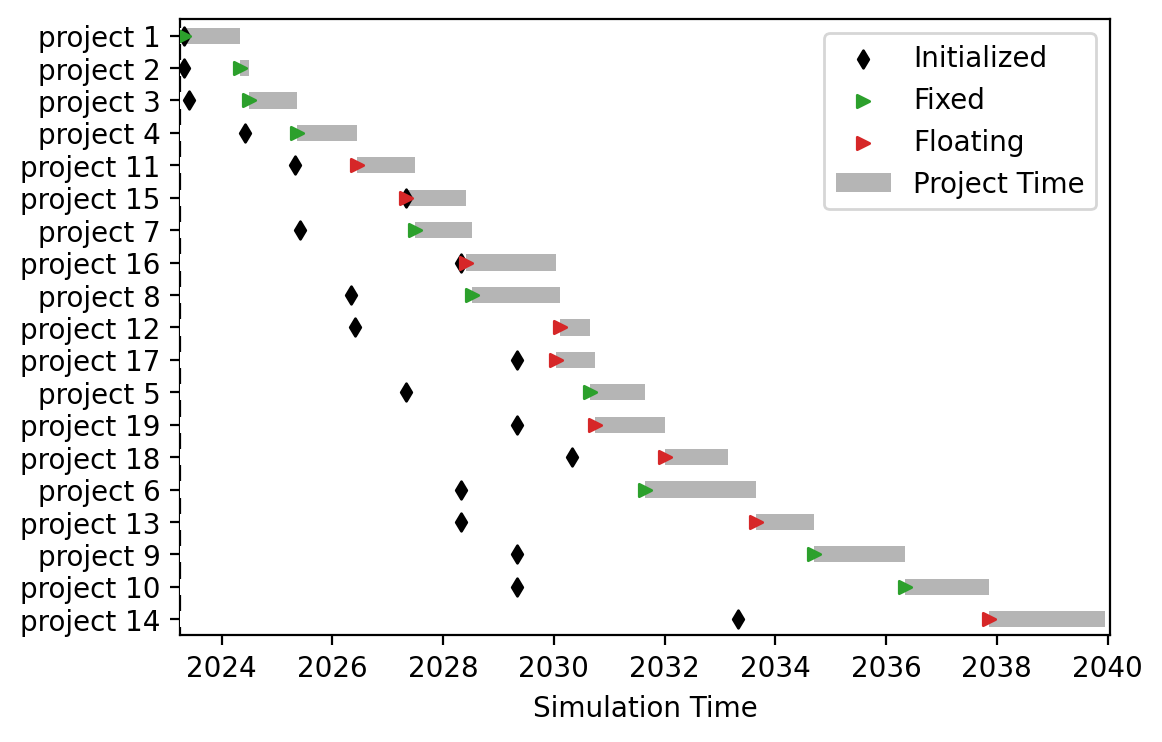

In [14]:
fig = plt.figure(figsize=(6, 4), dpi=200)
ax = fig.add_subplot(111)

color_map = {
    "fixed": "tab:green",
    "floating": "tab:red",
}

df["Date Finished"].plot(kind="barh", ax=ax, zorder=4, label="Project Time", color="#B5B5B5")
df["Date Started"].plot(kind="barh", color="w", ax=ax, zorder=4, label="__nolabel__")

df.plot(kind="scatter", x="Date Initialized", y="index", color='k', ax=ax, zorder=5, label="Initialized", marker="d")
# df.plot(kind="scatter", x="request-wtiv-date", y="index", color='tab:orange', ax=ax, zorder=5, label="WTIV", marker="x")

groups = df.groupby("substructure")
for name, group in groups:
    group.plot(kind="scatter", x="Date Started", y="index", ax=ax, marker=">", c=color_map[name], zorder=5, label=name.capitalize())

ax.set_xlabel("Simulation Time")
ax.set_ylabel("")
_ = ax.set_yticklabels(df['name'])

ax.legend()

ax.set_xlim(manager._start - dt.timedelta(days=30), df["Date Finished"].max() + dt.timedelta(days=30))
plt.savefig('analysis/results/combined_test.png')

In [15]:
pipeline.projects

,name,location,lat,lon,capacity,turbine,depth,distance_to_site_(km),distance_to_shore,substructure,estimated_cod,estimated_start,start_date,associated_port,port_region,Notes,_cap,num_turbines
0,project 1,MA,41.006420,-70.477650,800,12MW_generic,40,100,33,monopile,2024,2023,2023-05-01,new_bedford,northeast,NaN,12.0,67
1,project 2,MA/RI,41.078046,-71.543159,132,12MW_generic,40,57,56,monopile,2023,2023,2023-05-01,new_london,northeast,NaN,12.0,11
2,project 3,MA/RI,41.270313,-71.144904,704,12MW_generic,40,80,15,monopile,2024,2023,2023-06-01,new_london,northeast,NaN,12.0,59
3,project 4,MA/RI,40.979722,-71.279167,880,12MW_generic,40,75,48,monopile,2025,2024,2024-06-01,new_london,northeast,Updated expected COD/start date,12.0,74
4,project 5,MA/RI,40.979722,-71.279167,880,15MW_generic,40,240,48,monopile,2028,2027,2027-05-01,new_bedford,northeast,Added.,15.0,59
5,project 6,MA,40.960000,-70.829972,2000,15MW_generic,40,65,33,monopile,2030,2028,2028-05-01,new_london,northeast,"Consolidated Bay state a, b, c. Updated expec...",15.0,134
6,project 7,MA,40.917778,-70.885278,804,15MW_generic,40,300,37,monopile,2026,2025,2025-06-01,new_bedford,northeast,Assumes Salem (and pushed start date to 2025),15.0,54
7,project 8,MA,0.000000,0.000000,1232,15MW_generic,40,300,50,monopile,2027,2026,2026-05-01,new_bedford,northeast,Updated from VW south (residual). Assumes Sal...,15.0,83
8,project 9,MA,40.730556,-70.599444,1230,15MW_generic,40,320,96,monopile,2030,2029,2029-05-01,sbmt,northeast,Updated start date. Stage out of SBMT,15.0,82
9,project 10,MA,40.730556,-70.599444,1200,15MW_generic,40,300,96,monopile,2030,2029,2029-05-01,new_bedford,northeast,Added. Stage out of SBMT,15.0,80
